# Investigating fourier transformation in 1D

We use the Fourier transformation to transform a signal from the time domain into the frequency domain. That means, we split up the signal and separate the content of each frequency from each other. Doing so, we can analyse our signal according to energy content per frequency. We can extract information on how much amplitude each frequency contributes to the final signal.




<div>
<img src="./FT.png" width="300"/>
</div>

The Fourier transformation is based on the Fourier series. With the Fourier series we can approximate an (unknown) function $𝑓(𝑥)$
by another function $𝑔_𝑛(𝑥)$ which consists of a sum over 𝑁 basis functions weighted by some coefficients. The basis functions need to be orthogonal. 𝑠𝑖𝑛 and 𝑐𝑜𝑠 functions seem to be a pretty good choice because any signal can be filtered into several sinusoidal paths. In the period range of $[−𝑇/2;𝑇/2]$ the Fourier series is defined as:

$f(t) \approx g_n(t) = \frac{1}{2} a_0 + \sum_{k=1}^N \left[ a_k \cos \left(\frac{2\pi k t}{T} \right) + b_k \sin\left(\frac{2\pi k t}{T}\right)\right]$

$a_k = \frac{2}{T} \int_{-T/2}^{T/2} f(t) \cos\left(\frac{2\pi k t}{T}\right)dt$

$b_k = \frac{2}{T} \int_{-T/2}^{T/2} f(t) \sin\left(\frac{2\pi k t}{T}\right)dt$


At this stage, we consider continuous, periodic and infinite functions. The more basis functions are used to approximate the unknown function, the better is the approximation, i.e. the more similar the unknown function is to its approximation.

For a non-periodic function the interval of periodicity tends to infinity. That means, the steps between neighbouring frequencies become smaller and smaller and thus the infinite sum of the Fourier series turns into an integral and we end up with the integral form of the Fourier transformation:

$F(\omega) = \frac{1}{2\pi} \int_{-\infty}^{\infty} f(t) e^{-i\omega t} dt \leftrightarrow f(t) =  \int_{-\infty}^{\infty} F(\omega)e^{i\omega t}dt$

Attention: sign and factor conventions can be different in the literature!

We do not have continuous but discrete time signals. Therefore, we work with the discrete form of the Fourier transformation:

$F_k = \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{-2\pi i k j /N} \leftrightarrow f_k = \sum_{j=0}^{N-1} F_j e^{2\pi i k j /N}$

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Cell 0 - Preparation: load packages, set some basic options  
%matplotlib inline
from scipy import signal
#from obspy.signal.invsim import cosine_taper 
from matplotlib import rcParams
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15, 3


# Cell 1: create periodic, discrete, finite signal

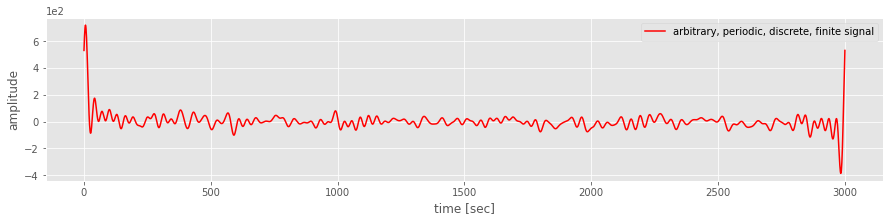

In [3]:

# number of samples (intial value: 3000)
samp = 3000
# sample rate (initial value: 1)
dt = 1
# period
T = 1.0 / dt
length = samp * dt
# number of coefficients (initial value: 100)
N = 100

t = np.linspace(0, length, samp)             # time axis
sig=np.load("signal.npy")
# plotting
plt.plot(t, sig, 'r', label='arbitrary, periodic, discrete, finite signal')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.xlabel('time [sec]')
plt.ylabel('amplitude')
plt.legend()
plt.show()


## Cell 2: The Fourier series and its coefficients

In the following two code cells, we first define a function which calculates the coefficients of the Fourier series for a given function. The function in the next cell does it the other way round: it is creating a function based on given coefficients and weighting factors.


In [4]:
 
def fourier_series_coeff(f, T, N):
    """Calculates the first 2*N+1 Fourier series coeff. of a periodic function.

    Given a periodic, function f(t) with period T, this function returns the
    coefficients a0, {a1,a2,...},{b1,b2,...} such that:

    f(t) ~= a0/2+ sum_{k=1}^{N} ( a_k*cos(2*pi*k*t/T) + b_k*sin(2*pi*k*t/T) )
    
    Parameters
    ----------
    f : the periodic function, a callable like f(t)
    T : the period of the function f, so that f(0)==f(T)
    N_max : the function will return the first N_max + 1 Fourier coeff.

    Returns
    -------
    a0 : float
    a,b : numpy float arrays describing respectively the cosine and sine coeff.
    """
    # From Nyquist theorem we must use a sampling 
    # freq. larger than the maximum frequency you want to catch in the signal. 
    f_sample = 2 * N
    
    # We also need to use an integer sampling frequency, or the
    # points will not be equispaced between 0 and 1. We then add +2 to f_sample.
    t, dt = np.linspace(0, T, f_sample + 2, endpoint=False, retstep=True)
    y = np.fft.rfft(f) / t.size
    y *= 2
    return y[0].real, y[1:-1].real[0:N], -y[1:-1].imag[0:N]


## # Cell 3: Excercise:
Using the Fourier series coefficients calculated in the above function $a_0, a,b$, calculate the fourier series with period $T$ at times $t$


$f(t) \approx g_n(t) = \frac{1}{2} a_0 + \sum_{k=1}^N \left[ a_k \cos \left(\frac{2\pi k t}{T} \right) + b_k \sin\left(\frac{2\pi k t}{T}\right)\right]$

$a_k = \frac{2}{T} \int_{-T/2}^{T/2} f(t) \cos\left(\frac{2\pi k t}{T}\right)dt$

$b_k = \frac{2}{T} \int_{-T/2}^{T/2} f(t) \sin\left(\frac{2\pi k t}{T}\right)dt$


In [5]:

def series_real_coeff(a0, a, b, t, T):
    """calculates the Fourier series with period T at times t,
       from the real coeff. a0,a,b"""
    tmp = np.ones_like(t) * a0 / 2.
    
    #IMPLEMENT YOUR CODE HERE:
    for x in [a*np.cos(2*np.pi*i*t/T) + b*np.sin(2*np.pi*i*t/T)for i, (a,b) in enumerate(zip(a,b))]:
        tmp += x
    
    return tmp


## Cell 4: 
Determine the first 'n' coefficients of the function using the code function of cell 1

In [6]:

T = 1        # period
n = 50        # number of coeffs to reconstruct
a0, a, b = fourier_series_coeff(sig, T, n)
a_ = a.astype(int)
b_ = b.astype(int)
print('coefficient a0 = ', int(a0))
print('array coefficients ak =', a_)
print('array coefficients bk =', b_)




coefficient a0 =  11
array coefficients ak = [216 187  40 276 216  69 216 217 159  42 219 215 130  41  73 279 127  69
 103 189 129 191  72 191 132  70 163 164  46 106 249 254 284 312 162 280
 244 182  95  46  47  44 228 159 105 163 250 196 314  79]
array coefficients bk = [206 118 265 235  29  89  30 236 236 296 263  29 265 119 207 262  58  61
 207 116  60 235 149 175 205  31 207 264 207 146  26 203 260 285 201 195
  78  24  60 238 206  60 228  54 146  84  82 203 254 262]


# Cell 5: 
Reconstruct the function using the code in cell 2

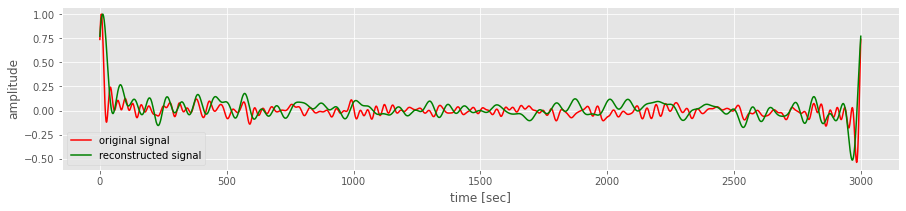

In [7]:


g = series_real_coeff(a0, a, b, t, dt)

# plotting
#plt.plot(t, sig, 'r', label='original signal')          # NOT normalized 
#plt.plot(t, g, 'g', label='reconstructed signal')
plt.plot(t, sig/max(sig), 'r', label='original signal')  # normalized 
plt.plot(t, g/max(g), 'g', label='reconstructed signal')

plt.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.xlabel('time [sec]')
plt.ylabel('amplitude')
plt.legend()

Coed provided by Giulio Ghirardo.
Check the full tutorial: 
https://krischer.github.io/seismo_live_build/html/Signal%20Processing/fourier_transform_solution_wrapper.html